**Scenario Simulation for Decarbonization**

This script performs a Monte Carlo simulation to estimate the financial benefits of a decarbonization investment under uncertainty. It models cost reduction and emission cuts using normal distributions, runs 1,000 simulations, and calculates the net benefit for each. The results are summarized with statistics and a histogram to assess the likelihood of a positive outcome. The key challenge was handling randomness while keeping values realistic and meaningful.

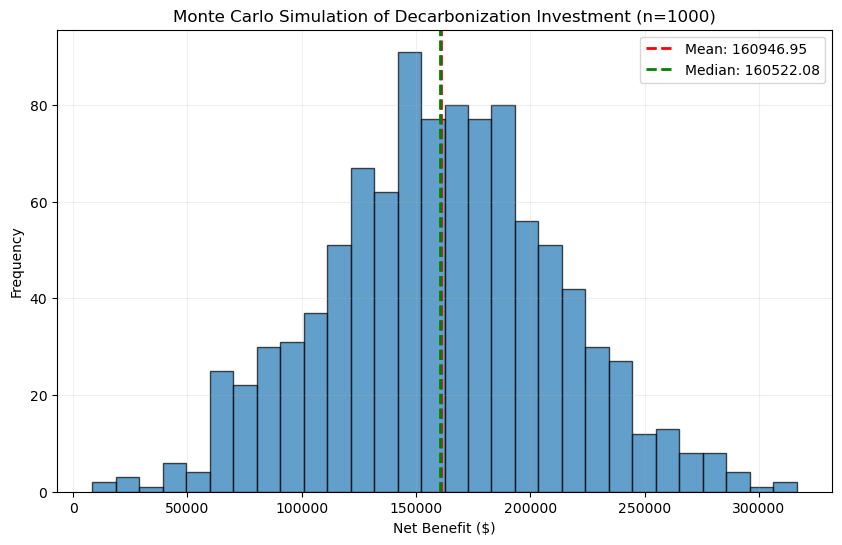


Simulation Summary Statistics:
Mean net benefit: $160,946.95
Median net benefit: $160,522.08
Standard deviation: $50,810.47
Minimum net benefit: $8,356.72
Maximum net benefit: $316,513.63
Probability of positive net benefit: 100.0%


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_scenario(investment):
    """
    Simulates a decarbonization scenario with uncertainty in cost reduction and emission cut factors.
    Uses normal distributions for the input parameters.
    """
    # Define means and standard deviations for our parameters
    mean_cost_reduction = 0.1
    std_cost_reduction = 0.02  
    
    mean_emission_cut = 0.05
    std_emission_cut = 0.01   
    
    # Generate random factors from normal distributions
    cost_reduction_factor = np.random.normal(mean_cost_reduction, std_cost_reduction)
    emission_cut_factor = np.random.normal(mean_emission_cut, std_emission_cut)
    
    # Ensure factors are positive 
    cost_reduction_factor = max(0, cost_reduction_factor)
    emission_cut_factor = max(0, emission_cut_factor)
    
    emission_value = 50 
    
    cost_reduction = investment * cost_reduction_factor
    emission_cut = investment * emission_cut_factor
    net_benefit = (emission_cut * emission_value) - (investment - cost_reduction)
    return net_benefit

def monte_carlo_simulation(investment, n_runs=1000):
    """
    Runs Monte Carlo simulation and returns array of net benefits
    """
    net_benefits = np.zeros(n_runs)
    
    for i in range(n_runs):
        net_benefits[i] = simulate_scenario(investment)
    
    return net_benefits

# Parameters
investment = 100000
n_simulations = 1000

# Run Monte Carlo simulation
results = monte_carlo_simulation(investment, n_simulations)

# Analyze and plot results
plt.figure(figsize=(10, 6))
plt.hist(results, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=np.mean(results), color='r', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(results):.2f}')
plt.axvline(x=np.median(results), color='g', linestyle='dashed', linewidth=2, label=f'Median: {np.median(results):.2f}')
plt.xlabel('Net Benefit ($)')
plt.ylabel('Frequency')
plt.title(f'Monte Carlo Simulation of Decarbonization Investment (n={n_simulations})')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

# Print summary statistics
print("\nSimulation Summary Statistics:")
print(f"Mean net benefit: ${np.mean(results):,.2f}")
print(f"Median net benefit: ${np.median(results):,.2f}")
print(f"Standard deviation: ${np.std(results):,.2f}")
print(f"Minimum net benefit: ${np.min(results):,.2f}")
print(f"Maximum net benefit: ${np.max(results):,.2f}")
print(f"Probability of positive net benefit: {100 * np.sum(results > 0) / n_simulations:.1f}%")